In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np




In [19]:
from sklearn.datasets import load_iris
data = load_iris()

X = data['data']
Y = data['target']

In [31]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [20]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [55]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 7)

kmeans.fit(X)

KMeans(n_clusters=7)

In [56]:
predictions = kmeans.predict(X)

predictions




array([1, 6, 6, 6, 1, 1, 6, 6, 6, 6, 1, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1,
       6, 6, 6, 6, 6, 1, 1, 6, 6, 1, 1, 1, 6, 6, 1, 6, 6, 6, 6, 6, 6, 1,
       1, 6, 1, 6, 1, 6, 4, 4, 4, 0, 4, 5, 4, 0, 4, 0, 0, 5, 5, 4, 0, 4,
       5, 5, 5, 0, 4, 5, 4, 4, 5, 4, 4, 4, 5, 0, 0, 0, 5, 4, 5, 4, 4, 5,
       5, 0, 5, 4, 5, 0, 5, 5, 5, 5, 0, 5, 2, 4, 3, 2, 2, 3, 5, 3, 2, 3,
       2, 2, 2, 4, 4, 2, 2, 3, 3, 4, 2, 4, 3, 4, 2, 3, 4, 4, 2, 3, 3, 3,
       2, 4, 4, 3, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4], dtype=int32)

In [57]:
centeroids = kmeans.cluster_centers_
centeroids

array([[5.34166667, 2.45833333, 3.625     , 1.13333333],
       [5.30454545, 3.73181818, 1.5       , 0.28181818],
       [6.56086957, 3.06956522, 5.52608696, 2.15217391],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.2375    , 2.878125  , 4.84375   , 1.63125   ],
       [5.8047619 , 2.73809524, 4.25714286, 1.31904762],
       [4.77142857, 3.18928571, 1.43214286, 0.21785714]])

In [58]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

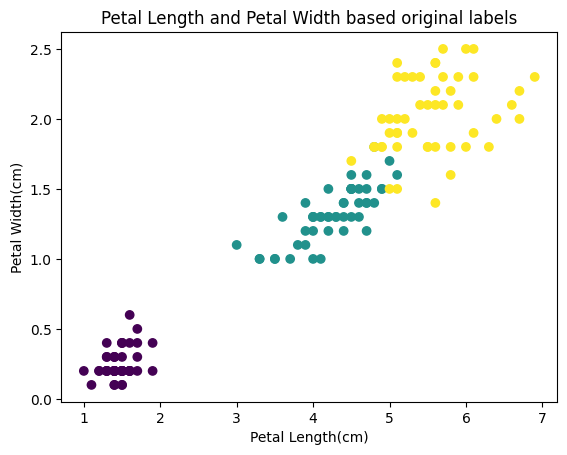

In [59]:
plt.scatter(X[: ,2], X[:, 3], c=Y);
plt.xlabel('Petal Length(cm)')
plt.ylabel('Petal Width(cm)')
plt.title('Petal Length and Petal Width based original labels');

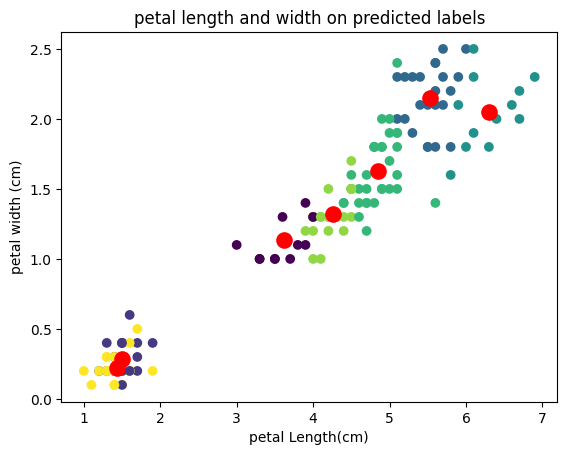

In [60]:
plt.scatter(X[:,2], X[:, 3], c= predictions);
plt.scatter(centeroids[:, 2], centeroids[:, 3], marker='o', color='red', s=120);
plt.xlabel('petal Length(cm)')
plt.ylabel('petal width (cm)');
plt.title('petal length and width on predicted labels');

Evaluation

In [61]:
inertia = kmeans.inertia_

inertia

35.343833462732924

In [62]:
k_inertia  = []
n_clusters = 10

for i in range(1,n_clusters):
    model = KMeans(n_clusters=i, random_state = 44)
    model.fit(X)
    k_inertia.append(model.inertia_)

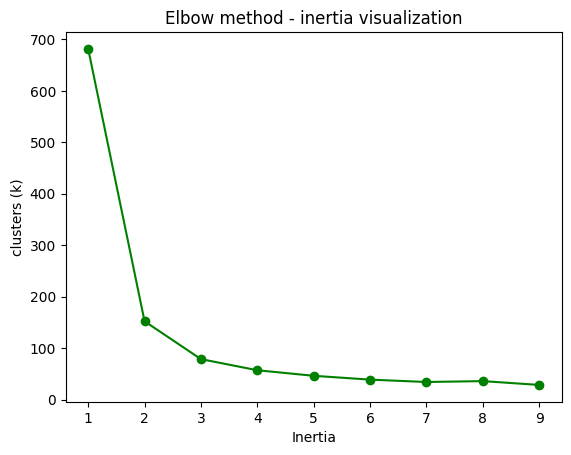

In [63]:
plt.plot(range(1,n_clusters), k_inertia, color='green', marker='o');

plt.xlabel('Inertia')
plt.ylabel('clusters (k)');
plt.title('Elbow method - inertia visualization');

In [36]:
sample_measurement = np.array([[6.2, 3.4, 5.4, 2.3]])

sample_prediction = kmeans.predict(sample_measurement)

flower = data['target_names'][sample_prediction]

print(flower)

['versicolor']


DBSCAN

In [1]:
from sklearn.datasets import load_iris

data = load_iris()

X = data['data']
Y= data['target']

In [3]:
from sklearn.cluster import DBSCAN

db_model = DBSCAN(eps=0.5, min_samples=4)

db_model.fit(X)

DBSCAN(min_samples=4)

In [4]:
predictions = db_model.labels_
predictions

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

Text(0.5, 1.0, 'DBSCAN')

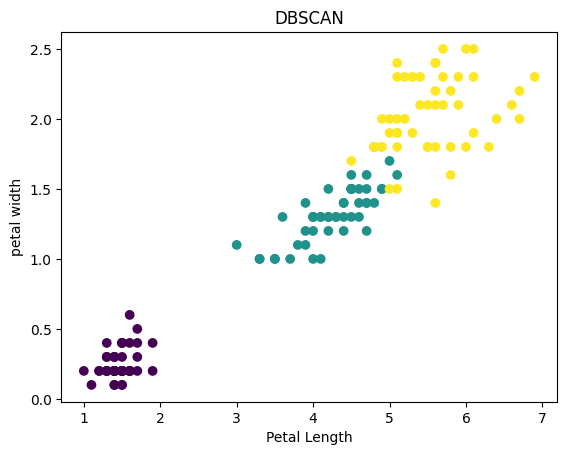

In [9]:
plt.scatter(X[:,2], X[:,3], c=Y)
plt.xlabel('Petal Length')
plt.ylabel('petal width')
plt.title('DBSCAN')

Text(0, 0.5, 'petal width')

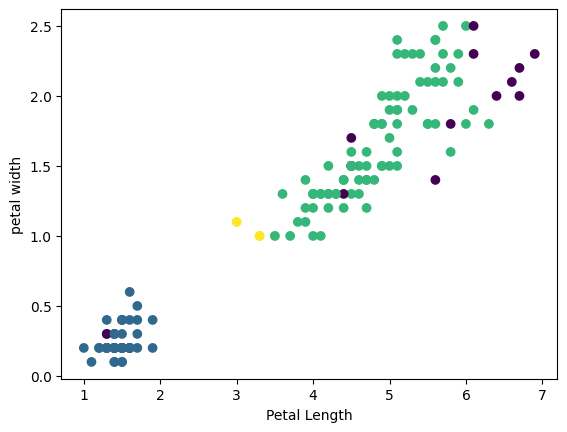

In [10]:
plt.scatter(X[:, 2], X[:, 3], c=predictions)
plt.xlabel('Petal Length')
plt.ylabel('petal width')

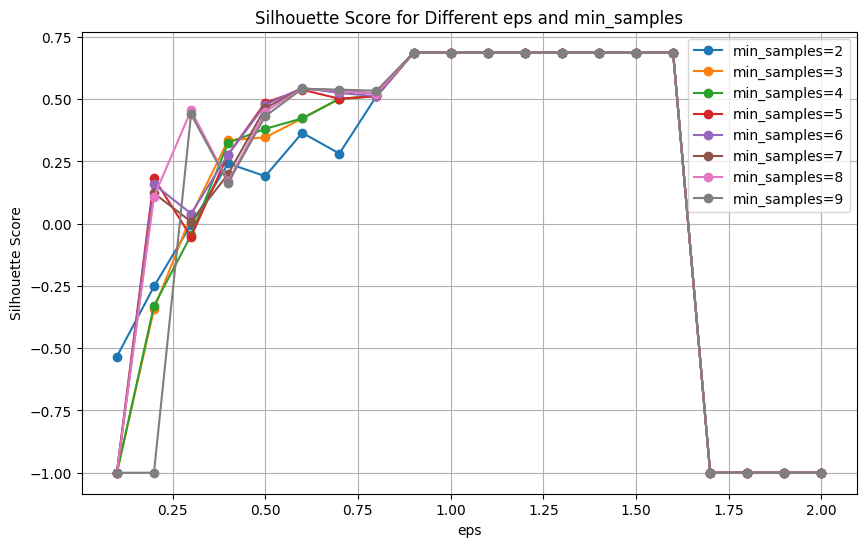

In [15]:
from sklearn.metrics import silhouette_score

eps_values = np.arange(0.1,0.5,1.1)
min_sample_values = range(2,10)

silhouette_scores = []

for eps in eps_values:
    for min_sample in min_sample_values:
        db_model = DBSCAN(eps= eps, min_samples=min_sample)
        labels = db_model.fit_predict(X)

        if len(set(labels)>1):
            score  = silhouette_score(X, labels)
            silhouette_scores.append((eps,min_sample, score))
        else:
            silhouette_scores.append((eps, min_sample, score))

silhouette_scores = np.array(silhouette_scores)

plt.figure(figsize=(10,6))

for min_samples in min_sample_values:
    subset = silhouette_scores[silhouette_scores[:,1] == min_sample]
    plt.plot(subset[:, 0], subset[:,2], marker = 'o', label=f'min_samples={min_sample}')


plt.title('Silhouette scores')
plt.xlabel('eps')
plt.ylabel('score')
plt.legend()
plt.grid()
plt.show()